# Random Number Generations

**Name:** Bowen Chen

**Section:** 1

**Date:** Jan 12, 2018 

In [1]:
# python set up
import numpy as np
import matplotlib.pyplot as plt
import math as m
import timeit

### Question 1

Use the Random Number generators discussed in the class to do the following:

(a) Using LGM method generate 10,000 Uniformly distributed random numbers on [0,1] and compute the empirical mean and the standard deviation of the sequence

**Solution:**

The sequence generated by LGM Method is defined as $X_{n+1} = 7^5 X_n \ \% \ (2^{31} -1)$, where $X_0$ is given. After the generation of sequence $X_n$, we could divide the whole sequence by M to get the uniform distribution U[0, 1]

set random seed $X_0$, generate random sequence $X_n$

In [2]:
def generate_random_sequence(seed, n):
    """
    Inputs:
        seed: the random seed X0
        n: The number of elements in the random sequence  
        
    Outputs:
        The random sequence Xi whose range is 0 to (2^31 - 1)
    """
    rand_sequence = [seed]
    for i in range(1, n + 1):
        rand_sequence.append(7**5 * rand_sequence[i-1] % (2**31 - 1))
        
    return rand_sequence[1:]

Obtain the 10,000 random draws from U[0, 1] by dividing the sequence $X_n$ by m, name the sequence U

In [3]:
# add 0.5 to the random sequence and divide by m, map this functio to the entire rand_sequence
rand_sequence = generate_random_sequence(seed = 7, n = 10000)
U = list(map(lambda x: (x + 0.5) / (2**31 - 1), rand_sequence))

Create a histogram of the generated sequence. The histogram shows the generated random numbers are samples from U[0, 1]

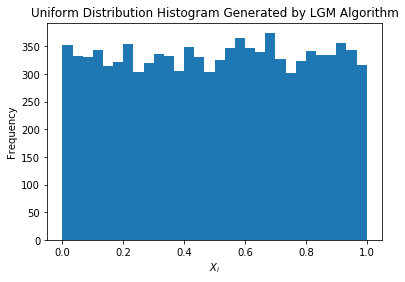

In [4]:
# Use these commands to generate plots
plt.hist(U, bins=30)
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.title('Uniform Distribution Histogram Generated by LGM Algorithm')
plt.show()

The empirical mean of the generated uniform distribution

In [5]:
mean_uniform = sum(U)/len(U)

In [6]:
print ("The emprical mean of the uniform distribution:" , round(mean_uniform, 5))

The emprical mean of the uniform distribution: 0.50159


The empirical standard deviation of the generated uniform distribution

In [7]:
var_uniform = sum(list(map(lambda x: (x - mean_uniform)**2, U)))/len(U)
sd_uniform = var_uniform**(0.5)
print ('The empirical standard deviation of the X distributions is :', round(sd_uniform, 5))

The empirical standard deviation of the X distributions is : 0.2891


(b) Now use built-in functions of whatever software you are using to do the same thing as in (a)

**Solution:**

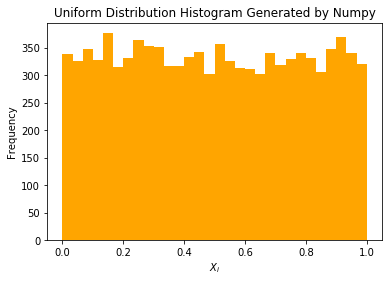

In [8]:
# Use Numpy generators
np.random.seed(7)
U_builtin = np.random.uniform(size=10000)
plt.hist(U_builtin, bins=30, color='orange' )
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.title('Uniform Distribution Histogram Generated by Numpy')
plt.show()

(c) Compare your findings in (a) and (b) and comment (be short but precise). 

**Solution:**

The two methods generated similar shaped distribution histograms, which both looks like uniform distributions. The specific sample drawed from the uniform might be a bit different, but there is no clear difference between two methods.

## Question 2

Use the numbers of part (a) of question 1 to do the following:

(a) Generate 10,000 random numbers with the following distribution:

\begin{equation*}
    X =  \begin{cases}
            -1 &\text{with probality 0.3}\\
            0 &\text{with probabilty 0.35}\\
            1 &\text{with probabilty 0.2}\\
            2 &\text{with probabilty 0.15}\\
         \end{cases}
\end{equation*}



**Solution:**

The method of solving this question is from the uniform distribution and push the value to the bounds when the simulated number falls in a certain range. Specifically,

1. Generate 10,000 random numbers $x_i$ from U[0, 1]

2. Check conditions:

    * if $x_i$ $\leq$ 0.3, set $x_i$ = -1, 
    * if 0.3 < $x_i$ $\leq$ (0.3 + 0.35), set $x_i$ = 0, 
    * if (0.3 + 0.35) < $x_i$ $\leq$ (0.3 + 0.35 + 0.2), set $x_i$ = 1,
    * if (0.3 + 0.35 + 0.2) < $x_i$ $\leq$ (0.3 + 0.35 + 0.2 + 0.15), set $x_i$ = 2

In [9]:
# build cases maps:
def case_mapping(n):
    if n < 0.3:
        n = -1
    elif 0.3 < n <= (0.3 + 0.35):
        n = 0
    elif (0.3 + 0.35) < n  <=  (0.3 + 0.35 + 0.2):
        n = 1
    else: 
        n = 2 
    return n

In [10]:
# map the function to the random number list generated in (a)
dist_x = list(map(case_mapping, U))

(b) Draw the histogram and compute the empirical mean and the standard deviation of the
sequence of 10,000 numbers generated above in part (a).

**Solution:** 

The histogram distribution should have approximately 3000 values of -1, 3500 values of 0, 2000 values of 1 and 1500 values of 2

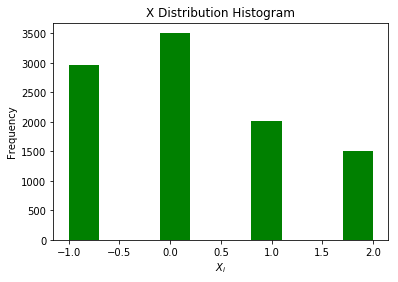

In [11]:
plt.hist(dist_x, color='green')
plt.title('X Distribution Histogram')
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.show()

The emprical mean of the X distribution

In [12]:
n = len(dist_x)
mean_x = sum(dist_x)/n
print ('The empirical mean of the X distributions is :', round(mean_x, 5))

The empirical mean of the X distributions is : 0.2067


The emprical standard deviation of the X distribution

In [13]:
var_x = sum(list(map(lambda x: (x - mean_x)**2, dist_x)))/n
sd_x = var_x**(0.5)
print ('The empirical standard deviation of the X distributions is :', round(sd_x, 5))

The empirical standard deviation of the X distributions is : 1.02955


## Question 3

Use the idea of part (a) of Question 1 to do the following:


(a) Generate 1,000 random numbers with Binomial distribution with 𝑛 = 44 and 𝑝 = 0.64. 

**Solution:**

To find random numbers for binomial distribution, we generate the random numbers from Bernoulli Distributions and take the sum of the generated Bernoulli random numbers. Every binomial random number correspond to 44 Bernoulli random numbers, we should first generate 44,000 Bernoulli random numbers.

Simulate 44,000 U[0, 1] random numbers, name the list of random numbers as U2

In [14]:
# same function mapping as in Question 1
rand_sequence = generate_random_sequence(seed = 7, n = 44000)
U44 = list(map(lambda x: (x + 0.5) /  (2**31 - 1), rand_sequence))

Change the U2 sequence to Bernoulli random numbers with probabilty *p* = 0.64, name the sequence *bernoulli *

In [15]:
# map the U2 sequence to a conditional lambda function
p = 0.64
bernoulli = list(map(lambda x: 1 if x < p else 0, U44))

Split the Bernoulli sequence into 1,000 sublists 

In [16]:
# generate split points
split_points= list(range(0, 44000, 44))

# use list comprehension, split the bernoulli list into 1000 sublists and save all the sublists into a giant list 
sublists = [bernoulli[i: i + 44] for i in split_points]

Take the sum of each sublist, we will get Binomial random numbers, name the Binomial sequence *binomial*

In [17]:
# map the sum function to all sublists
binomial = list(map(sum, sublists))

(b) Draw the histogram. Compute the probability that the random variable X that has Binomial (44, 0.64) distribution, is at least 40: 𝑃(𝑋 ≥ 40). Use any statistics textbook or online resources for the exact number for the above probability and compare it with your finding and comment.

**Solution:**

The histogram of the Binomial sequence

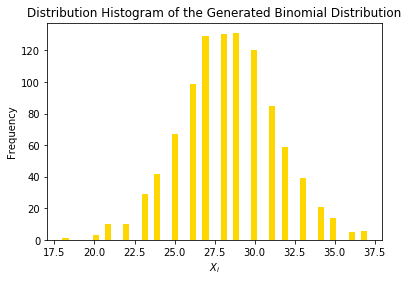

In [18]:
plt.hist(binomial, bins=50, color='gold')
plt.title('Distribution Histogram of the Generated Binomial Distribution')
plt.xlabel('$X_i$')
plt.ylabel('Frequency')
plt.show()

To compute the probability that the random variable X that has Binomial (44, 0.64) distribution, is at least 40: 𝑃(𝑋 ≥ 40), we could just find the proportion of the realizations that are greater than 40

In [19]:
# Find the list of realizations that are greater than 40
greater_40 = list(map(lambda x: 1 if x >= 40 else 0, binomial))

In [20]:
# count the number of elements greater than 40
n_greater_40 = sum(greater_40)

In [21]:
# Find the probability of realizations of 𝑋 ≥ 40
p_greater_40 = n_greater_40 / len(binomial)

In [22]:
print ("The probability that the random variable X that has Binomial (44, 0.64) distribution, is at least 40: P(𝑋 ≥ 40) =" ,
       p_greater_40)

The probability that the random variable X that has Binomial (44, 0.64) distribution, is at least 40: P(𝑋 ≥ 40) = 0.0


Using the online Binomial calculator, the emprical result of P(𝑋 ≥ 40) = 0.0 is confirmed, as the calculator also returns P(𝑋 ≥ 40) = 0.0

Since the binomial distribution's mean and standard deviation could be found by 
* $\mu$ = np =  44 x 0.64 = 28.16
* $\sigma$ = np (1- p) = 44 x 0.64 (1 - 0.64) = 10.14 

The event of having a realization further than 1 $\sigma$ away is very unlikely for binomial distributions

## Question 4

Use the numbers of part (a) of question 1 to do the following:

(a) Generate 10,000 Exponentially distributed random numbers with parameter 𝜆 = 1.5

**Solution:**

Using the inverse transformation method, set Y = -$\frac{1}{\lambda} ln(U)$, Y will have the expotential distribution. Use the 10,000 Uniform random numbers from (a),

In [23]:
# map the function Y = - (1/λ) ln(U) to the U1 sequence 
lmda = 1.5 
expotential = list(map(lambda y: -1/lmda * m.log(y), U))

(b) Compute 𝑃(Y ≥ 1) and 𝑃(Y ≥ 4)

**Solution:**

Using the same technique in question 3, the 𝑃(Y ≥ 1) and 𝑃(Y ≥ 4) could be found by calculating the proportion of the realizations that satisfies the Y ≥ 1, Y ≥ 4 conditions

In [24]:
# find all of the realizations that has Y  ≥ 1, Y ≥ 4
greater_1 = list(map(lambda y: 1 if y >= 1 else 0, expotential))
greater_4 = list(map(lambda y: 1 if y >= 4 else 0, expotential))

In [25]:
# count the number of realizations that has Y  ≥ 1
n_greater_1 = sum(greater_1)
n_greater_4 = sum(greater_4)

In [26]:
# find 𝑃(Y ≥ 1) and 𝑃(Y ≥ 4)
p_greater_1 = n_greater_1 / len(greater_1)
p_greater_4 = n_greater_4 / len(greater_4)

In [27]:
print('𝑃(Y ≥ 1) = ', p_greater_1)
print('𝑃(Y ≥ 4) = ', p_greater_4)

𝑃(Y ≥ 1) =  0.2242
𝑃(Y ≥ 4) =  0.0044


(c) Compute the empirical mean and the standard deviation of the sequence of 10,000 numbers generated above in part (a). Draw the histogram by using the 10,000 numbers of part (a)

Plot the histogram of the generated expotential distributions

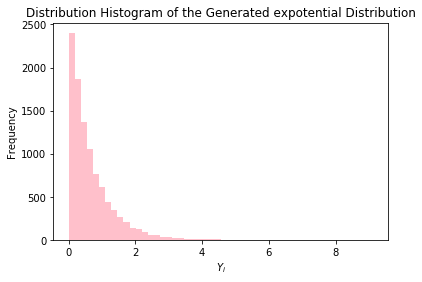

In [28]:
plt.hist(expotential, bins=50, color='pink')
plt.title('Distribution Histogram of the Generated expotential Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

The emprical mean of this expotential distribution

In [29]:
mean_exp = sum(expotential) / n
print ("The emprical mean of the simulated expotential distributions:", round(mean_exp, 5))

The emprical mean of the simulated expotential distributions: 0.67136


The emprical standard deviation of this expotential distribution

In [30]:
var_exp = sum(list(map(lambda y: (y - mean_exp)**2, expotential)))/n
sd_exp = var_exp**0.5
print ("The emprical standard deviation of the simulated expotential distributions:", round(sd_exp, 5))

The emprical standard deviation of the simulated expotential distributions: 0.69723


## Question 5

Use the idea of part (a) of Question 1 to do the following:

(a) Generate 5,000 Uniformly distributed random numbers on [0,1]

**Solution:**

Same as Question 1, the *generate_random_sequence* could be used, generate two independent sequences and store them in rand1 and rand2

In [31]:
rand1 = generate_random_sequence(n = 5000, seed = 101)
rand2 = generate_random_sequence(n = 5000, seed = 123)

Divide both whole sequences by $2^{31}$ - 1, scale the sequence to U [0, 1], store the generated uniform random numbers in U1 and U2

In [32]:
U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

(b) Generate 5,000 Normally distributed random numbers with mean 0 and variance 1, by BoxMuller
Method

**Solution:** 

The box-muller method is defined as the following,

Assume {$U_i^2$} ~ i.i.d $U[0, 1]$, define 


$$\begin{equation*}
       \begin{cases}
            Z_1 = \sqrt{-2 ln(U_1)} cos(2\pi U_2)\\
            Z_2 = \sqrt{-2 ln(U_1)} sin(2\pi U_2)\\
         \end{cases}
\end{equation*}$$

$Z_1$ and $Z_2$ will be two independent standard normal N [0 , 1] distributions 

For this question, we only have to use one of the $Z_1$ and $Z_2$ standard normal to generate random numbers

In [33]:
# define Z1 with the uniform random numbers U1 and U2
Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))

Histogram of generated normal distribution

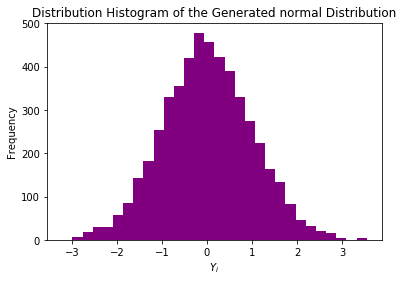

In [34]:
plt.hist(Z1, bins= 30, color = 'purple')
plt.title('Distribution Histogram of the Generated normal Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

The emprical mean of the normal distribution generated by box-muller method

In [35]:
mean_norm = sum(Z1) / len(Z1)
print ('The emprical mean of the simulated normal distributions with box-muller method:', round(mean_norm, 5))

The emprical mean of the simulated normal distributions with box-muller method: 0.01063


The emprical standard deviation of this normal distribution generated by box-muller method

In [36]:
var_norm = sum(list(map(lambda x: (x - mean_norm)**2, Z1)))/len(Z1)
sd_norm = m.sqrt(var_norm)
print ('The emprical mean of the simulated normal distributions with box-muller method:', round(sd_norm, 5))

The emprical mean of the simulated normal distributions with box-muller method: 0.99625


The calculated emprical mean and standard deviation reserve the properties of standard normal pretty well.

(d) Now use the Polar-Marsaglia method to do the same as in (b)

**Solution:** 

Assume {$U_i^2$} ~ i.i.d $U[0, 1]$, define $V_1 = 2U_1 -1$, $V_2 = 2U_2 -1$,$W = V_1^2 + V_2^2$, if $W \leq 1 $ , define

$$
\begin{equation*}
       \begin{cases}
            Z_1 = V_1\sqrt{-2 \frac{ln W}{W}}\\
            Z_2 = V_2\sqrt{-2 \frac{ln W}{W}}\\
         \end{cases}      
\end{equation*}
$$

$Z_1$ and $Z_2$ will be two independent standard normal N [0 , 1] distributions 

if  W > 1, regenerate W,

On average, about $\frac{3}{4}$ generated $Ws$ could be used, therefore, to generate 5000 normal samples, we need at least 5000 x $\frac{4}{3} \cong $6667 samples of uniform random numbers. We will only choose 5000 of them

In [37]:
def generate_normal(n, u1, u2):
    """
    Inputs:
        n: number of random numbers we wish to generate
        u1: pre-generated independenent uniform distributions #1
        u2: pre-generated independenent uniform distributions #2
    Outputs:
        Z2: the list contains n normal random numbers
    """
    Z2 = []
    i = 0
    while n > 0:
        
        # find v1, v2
        v1 = 2*u1[i] - 1
        v2 = 2*u2[i] - 1
        W = v1**2 + v2**2
        i += 1
        
        # acceptance-rejection of W
        if W <= 1:
            A = m.sqrt(-2*m.log(W)/W)
            Z2.append(v2 * A)
            n -= 1
        else:
            pass
        
    return Z2

In [38]:
# generate U1, U2
U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), generate_random_sequence(n = 6500, seed = 101)))
U2 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), generate_random_sequence(n = 6500, seed = 123))) 

In [39]:
# generate N(0, 1)
Z2 = generate_normal(5000, U1, U2)

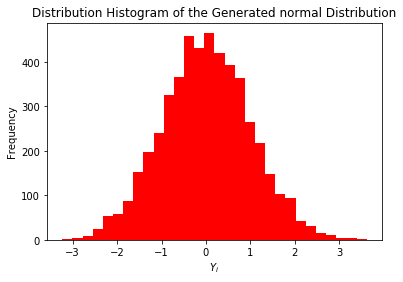

In [40]:
plt.hist(Z2, color ='red', bins = 30)
plt.title('Distribution Histogram of the Generated normal Distribution')
plt.xlabel('$Y_i$')
plt.ylabel('Frequency')
plt.show()

The emprical mean of the normal distribution generated by Polar-Marsaglia method

In [41]:
mean_norm = sum(Z2) / len(Z2)
print ('The emprical mean of the simulated normal distributions with Polar-Marsaglia method:', round(mean_norm, 5))

The emprical mean of the simulated normal distributions with Polar-Marsaglia method: 0.01116


The emprical standard deviation of the normal distribution generated by Polar-Marsaglia method

In [42]:
var_norm = sum(list(map(lambda x: (x - mean_norm)**2, Z2)))/len(Z2)
sd_norm = m.sqrt(var_norm)
print ('The emprical mean of the simulated normal distributions with box-muller method:', round(sd_norm, 5))

The emprical mean of the simulated normal distributions with box-muller method: 0.99757


(e) Now compare the efficiencies of the two above-algorithms, by comparing the execution
times to generate 5,000 normally distributed random numbers by the two methods. Which
one is more efficient? If you do not see a clear difference, you need to increase the number
of generated realizations of random variables to 10,000, 20,000, etc. 

**Solution:** 

Using Python's built-in function *timeit*

Time box-muller method

In [43]:
start_time = timeit.default_timer()
# box-muller method
rand1 = generate_random_sequence(n = 5000, seed = 101)
rand2 = generate_random_sequence(n = 5000, seed = 123)

U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

Z1 = list(map(lambda u1, u2: m.sqrt(-2*m.log(u1)) * m.sin(2*m.pi*u2), U1, U2))

box_muller_time = timeit.default_timer() - start_time

In [44]:
print ('Time for generating 5000 random normal samples using box-muller method: '
       + str(round(box_muller_time, 5)) + 's')

Time for generating 5000 random normal samples using box-muller method: 0.01625s


Time Polar-Marsaglia method

In [45]:
start_time = timeit.default_timer()
# box-muller method
rand1 = generate_random_sequence(n = 6500, seed = 101)
rand2 = generate_random_sequence(n = 6500, seed = 123)

U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand1))
U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand2))

Z2 = generate_normal(5000, U1, U2)

polar_marsaglia_time = timeit.default_timer() - start_time

In [46]:
print ('Time for generating 5000 random normal samples using Polar-Marsaglia method: '
       + str(round(polar_marsaglia_time, 5)) + 's')

Time for generating 5000 random normal samples using Polar-Marsaglia method: 0.02296s


From the comparison of execution time, box-muller method is more efficient based on the implementations presented above. The possible reason of the inferior performance of Polar-Marsaglia is due to the inefficiencies to generate uniform random numbers. I calculated the approximate number of uniform numbers needed for the acceptance-rejection criteria, but in fact, we might never need that many uniform random numbers for us to generate normal random numbers.